

# Hot Topics in Data Science

   In this project, we will be in search for an answer to the following question:
   "What is it that people want to learn about in data science?"
    
## Stack Exchange 
   Stack Exchange is a popular webpage which hosts sites on a multitude of fields 
   and subjects, including mathematics, physics, philosophy, and ***data science*** !
   The website employs a reputation award system for its questions and answers. 
   Each post — each question/answer — is a post that is subject to upvotes and 
   downvotes. This ensures that good posts are easily identifiable. 
    
   Stack Exchange provides a public data base for each of its websites. 
   Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and 
   explore Data Science Stack Exchange's database.
   
   By writing a simple SQL query and saving it as a .csv file, data science community
   is able to derive valuable results from the obtained data. For our purpose, analyzing 
   all questions posted in 2019 seems promising. 
   
   We run the following query to extract the relevant data and then save it as a .csv file
   called **2019_questions.csv**:
   
   ```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```


#### Here's what the first few rows look like:

<table>
  <tr>
    <th>Id</th>
    <th>PostTypeId</th>
    <th>CreationDate</th>
    <th>Score</th>
    <th>ViewCount</th>
    <th>Tags</th>
    <th>AnswerCount</th>
    <th>FavoriteCount</th>
  </tr>
  <tr>
    <td>44419</td>
    <td>1</td>
    <td>2019-01-23 09:21:13</td>
    <td>1</td>
    <td>21</td>
    <td>&lt;machine-learning&gt;&lt;data-mining&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44420</td>
    <td>1</td>
    <td>2019-01-23 09:34:01</td>
    <td>0</td>
    <td>25</td>
    <td>&lt;machine-learning&gt;&lt;regression&gt;&lt;linear-regression&gt;&lt;regularization&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44423</td>
    <td>1</td>
    <td>2019-01-23 09:58:41</td>
    <td>2</td>
    <td>1651</td>
    <td>&lt;python&gt;&lt;time-series&gt;&lt;forecast&gt;&lt;forecasting&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
</table>

   
## Importing the Data in a Dataframe

We can read in the data file **2019_questions.csv** into a dataframe.
But before let us import all libraries we will need.
   
   
   
   





In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools as it
import datetime as dt
%matplotlib inline

In [2]:
df=pd.read_csv('2019_questions.csv')

We first inspect the dataframe for possible cleaning and preperation issues.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


## Cleaning the Data

#### After loading the csv file into pandas dataframe, a quick inspection reveals the following:
* FavoriteCount column has 7432 NAN values. Column data type is float but should be set to integer. Also changing NAN values to 0 seems reasonable.
* CreationDate column has object dtype but converting it to datetime object can help us while analyzing dataframe.
* Tags column consists of multiple tags so it makes data analysis problematic.

We will begin our data cleaning step by fixing above issues starting from 'FavoriteCount' column.


In [4]:
df['CreationDate']=df['CreationDate'].apply(pd.to_datetime)
df['FavoriteCount']=df['FavoriteCount'].fillna(0).astype(int)
df['FavoriteCount'].value_counts()

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

#### Now it is time to modify the 'Tags' column in order to work with easily.

* Each tag is seperated by a comma and we create a new column called
'No_Of_tags' which counts the tags used.
* Create a new column 'tag_list' which keeps tags in list format
to simplify data analysis process.
* Check the changes.


In [5]:
lst=['<','>']
df['Tags']=df['Tags'].str.replace('><',',').str.translate({ord(x):'' for x in lst})
df['No_Of_tags']=df['Tags'].str.count(',')+1
df['tags_list']=df['Tags'].str.split(',')
df[['Tags','No_Of_tags','tags_list']].head()



,Tags,No_Of_tags,tags_list
0,"machine-learning,data-mining",2,"[machine-learning, data-mining]"
1,"machine-learning,regression,linear-regression,...",4,"[machine-learning, regression, linear-regressi..."
2,"python,time-series,forecast,forecasting",4,"[python, time-series, forecast, forecasting]"
3,"machine-learning,scikit-learn,pca",3,"[machine-learning, scikit-learn, pca]"
4,"dataset,bigdata,data,speech-to-text",4,"[dataset, bigdata, data, speech-to-text]"


## Most Used and Viewed Tags

We can have an idea about most popular topics in data science in 2019 
by counting how many times each tag is used or viewed in 2019.


In [6]:
#list of all distinct tags
tags_list=df['tags_list'].sum()
distinct_tags=set(tags_list)
len(distinct_tags)
# tags_list

526

There are 526 distinct tags used in 2019 Stack Exchange questons.
We know there are 8839 questions.
Now let us count how many times each of them is used and store results in a dictionary
named **count_tags** where **key=tag** and **value=count**.

In [7]:
count_tags={}
for tag in distinct_tags:
    mask=df['tags_list'].apply(lambda x: True if tag in x else False)
    count_tags[tag]=mask.sum()

In [8]:
# Sort the values in descending order into a list.
sort_count_tags = sorted(count_tags.items(), key=lambda x: x[1], reverse=True)

#List top 20 popular tags
sort_count_tags[:20]

[('machine-learning', 2693),
 ('python', 1814),
 ('deep-learning', 1220),
 ('neural-network', 1055),
 ('keras', 935),
 ('classification', 685),
 ('tensorflow', 584),
 ('scikit-learn', 540),
 ('nlp', 493),
 ('cnn', 489),
 ('time-series', 466),
 ('lstm', 402),
 ('pandas', 354),
 ('regression', 347),
 ('dataset', 340),
 ('r', 268),
 ('predictive-modeling', 265),
 ('clustering', 257),
 ('statistics', 234),
 ('machine-learning-model', 224)]

<BarContainer object of 20 artists>

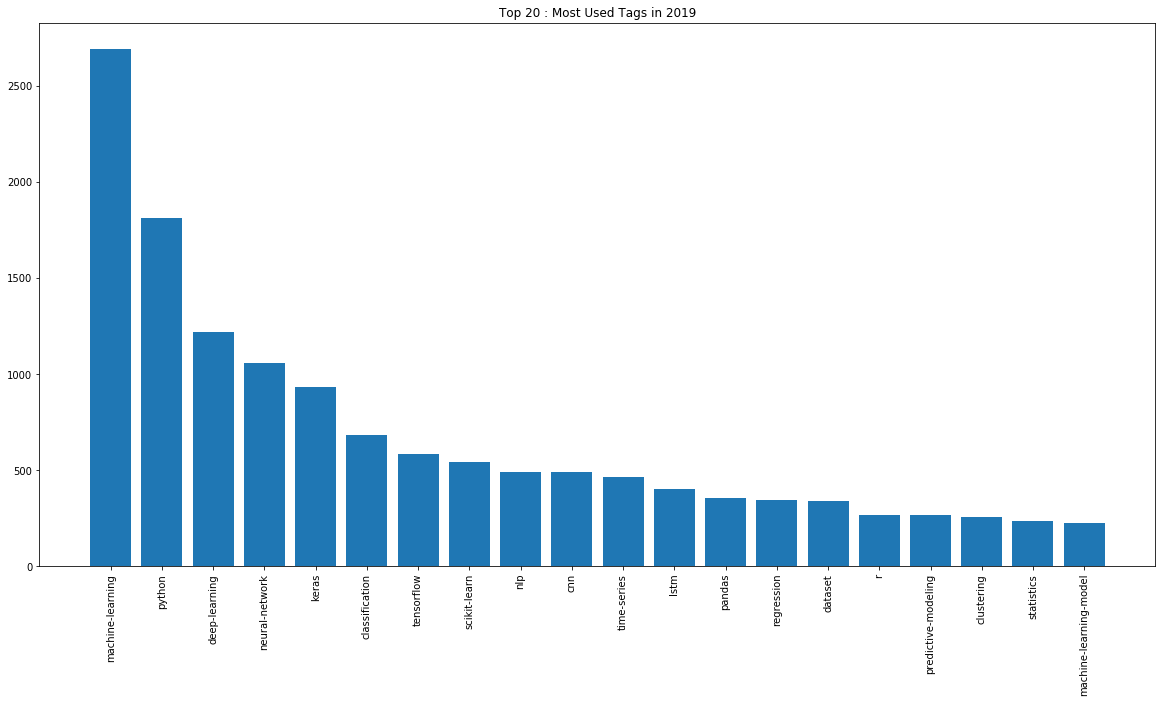

In [9]:
D=dict(sort_count_tags[:20])
plt.figure(figsize=(20,10))
plt.title('Top 20 : Most Used Tags in 2019')
plt.xticks(range(len(D)), list(D.keys()),rotation=90)
plt.bar(range(len(D)), D.values(), align='center')

#### Let us repeat the same process for views.
we create a dictionary called **view_count_tags** where **key=tag** and **value=views**.

In [10]:
view_count_tags={}
for tag in distinct_tags:
    mask=df['tags_list'].apply(lambda x: True if tag in x else False)
    view_count_tags[tag]=df.loc[mask,'ViewCount'].sum()

# Sort the values in descending order into a list.    
sort_view_count_tags = sorted(view_count_tags.items(), key=lambda x: x[1], reverse=True)

# Top most viewed 20 tags 
sort_view_count_tags[:20]    

[('python', 537585),
 ('machine-learning', 388499),
 ('keras', 268608),
 ('deep-learning', 233628),
 ('pandas', 201787),
 ('neural-network', 185367),
 ('scikit-learn', 128110),
 ('tensorflow', 121369),
 ('classification', 104457),
 ('dataframe', 89352),
 ('lstm', 74458),
 ('nlp', 71382),
 ('cnn', 70349),
 ('time-series', 64134),
 ('numpy', 49767),
 ('regression', 49451),
 ('dataset', 43151),
 ('pytorch', 40240),
 ('csv', 38654),
 ('clustering', 33928)]

<BarContainer object of 20 artists>

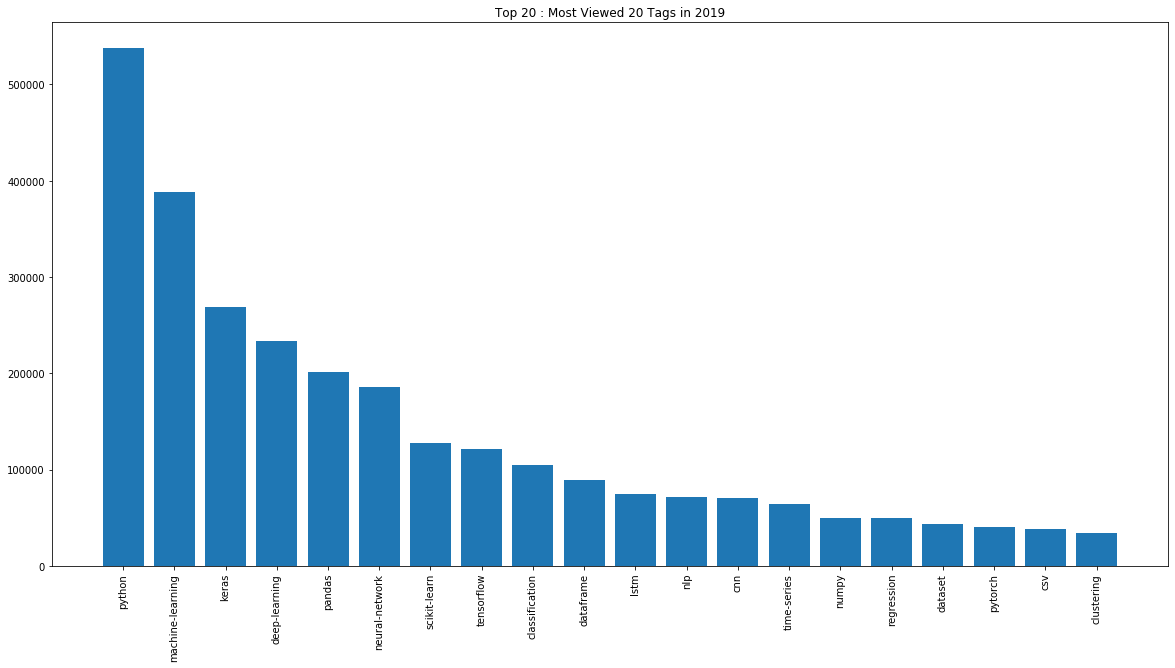

In [11]:
D=dict(sort_view_count_tags[:20])
plt.figure(figsize=(20,10))
plt.title('Top 20 : Most Viewed 20 Tags in 2019')
plt.xticks(range(len(D)), list(D.keys()),rotation=90)
plt.bar(range(len(D)), D.values(), align='center')



In [12]:
# Convert the count_tags dictionary into a dataframe
used=pd.DataFrame.from_dict(count_tags,orient='index')
used.columns=['Count']
most_used=used.sort_values(by='Count',ascending=False).head(20)
most_used.head(20)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [13]:
# Convert the view_count_tags dictionary into a dataframe
viewed=pd.DataFrame.from_dict(view_count_tags,orient='index')
viewed.columns=['ViewCount']
most_viewed=viewed.sort_values(by='ViewCount',ascending=False).head(20)
most_viewed.head(20)

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


## How are tags related?
One way of finding how pairs of tags are related to each other, is to count how many times each pair appears together. 
In this part, we will look for associations between pairs of tags.

Let us start off by obtaining a set of tags mostly used and viewed.
Some of the tags only used in one of them.

In [14]:

ix_most_viewed=set(most_viewed.index)
ix_most_used=set(most_used.index)
print('Appears only in top 20 used list : {}'.format(ix_most_used-ix_most_viewed))
print('Appears only in top 20 viewed list{}'.format(ix_most_viewed-ix_most_used))

# set of tags showing up in top 20 mostly used or viewed list
ix_most_used_and_viewed=ix_most_viewed | ix_most_used

Appears only in top 20 used list : {'statistics', 'predictive-modeling', 'machine-learning-model', 'r'}
Appears only in top 20 viewed list{'csv', 'pytorch', 'dataframe', 'numpy'}


#####  * We use itertools library to find all possible pairs.
##### * Count how many times each pair appears in the same question.

In [15]:
top_comb=list(it.combinations(ix_most_used_and_viewed,2))
Count_Top_Pairs=pd.DataFrame(index=top_comb)
Count_Top_Pairs['Count_Pair_Used']=0
for pair in top_comb:
    mask=df['tags_list'].apply(lambda x : set(pair).issubset(x))
    Count_Top_Pairs.loc[pair,'Count_Pair_Used']=mask.sum()
    
Count_Top_Pairs=Count_Top_Pairs.sort_values(by='Count_Pair_Used',ascending=False)

In [16]:
# Top 20 pairs
print(Count_Top_Pairs.head(20))

# Pairs never show up together
mask=Count_Top_Pairs['Count_Pair_Used']==0
print(Count_Top_Pairs[mask])

                                            Count_Pair_Used
(machine-learning, python)                              499
(deep-learning, machine-learning)                       429
(neural-network, machine-learning)                      366
(deep-learning, neural-network)                         305
(keras, python)                                         280
(classification, machine-learning)                      259
(keras, tensorflow)                                     256
(deep-learning, keras)                                  247
(pandas, python)                                        244
(keras, neural-network)                                 235
(scikit-learn, python)                                  235
(keras, machine-learning)                               195
(scikit-learn, machine-learning)                        188
(python, tensorflow)                                    167
(deep-learning, python)                                 160
(deep-learning, cnn)                    

#### We repeat the same process for triples.

In [17]:
# List of all triples
top_comb_3=list(it.combinations(ix_most_used_and_viewed,3))

#Count top triples
Count_Top_Triples=pd.DataFrame(index=top_comb_3)
Count_Top_Triples['Count_Triple_Used']=0
for triple in top_comb_3:
    mask=df['tags_list'].apply(lambda x : set(triple).issubset(x))
    Count_Top_Triples.loc[triple,'Count_Triple_Used']=mask.sum()
    
Count_Top_Triples=Count_Top_Triples.sort_values(by='Count_Triple_Used',ascending=False)

# Print top 20 results
print(Count_Top_Triples.head(20))
# mask=Count_Top_Triples['Count_Triple_Used']==0
# print(Count_Top_Triples[mask])

                                                   Count_Triple_Used
(deep-learning, neural-network, machine-learning)                124
(scikit-learn, machine-learning, python)                          93
(keras, python, tensorflow)                                       78
(deep-learning, keras, neural-network)                            70
(keras, neural-network, machine-learning)                         64
(keras, machine-learning, python)                                 62
(deep-learning, keras, machine-learning)                          61
(deep-learning, keras, python)                                    57
(deep-learning, keras, tensorflow)                                56
(keras, neural-network, tensorflow)                               56
(neural-network, machine-learning, cnn)                           54
(keras, neural-network, python)                                   53
(deep-learning, machine-learning, python)                         50
(deep-learning, neural-network, cn

**The most used tags also seem to have the strongest relationships, as can be observed from the tables above.** 

# Deep Learning Over Time

You may have noticed that the most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common:

**python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn**.

Do you know what each of these or most of these tags means? Could there be strong relations between them?

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

To see the change in the popularity of deep learning over the years, 
let us select all data science related questions from Stack Exchange by
writing a simple SQL query and save results in a .csv file **all_questions.csv**:

   ```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```


### We repeat the same data cleaning process:

* Read in the file into a dataframe called df_all.
* Inspect the dataframe.
* We can use the same technique as before to clean the tags column.

In [18]:
df_all=pd.read_csv('all_questions.csv')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [19]:
df_all['Tags'].head()

0        <python><keras><tensorflow><cnn><probability>
1                                     <neural-network>
2                        <python><ibm-watson><chatbot>
3                                              <keras>
4    <r><predictive-modeling><machine-learning-mode...
Name: Tags, dtype: object

In [20]:
df_all['CreationDate']=df_all['CreationDate'].apply(pd.to_datetime)
lst=['<','>']
df_all['Tags']=df_all['Tags'].str.replace('><',',').str.translate({ord(x):'' for x in lst})
df_all['No_Of_tags']=df_all['Tags'].str.count(',')+1
df_all['tags_list']=df_all['Tags'].str.split(',')
df_all=df_all.sort_values(by='CreationDate')
df_all['CreationDate'].dtype
df_all.head()


,Id,CreationDate,Tags,No_Of_tags,tags_list
65,5,2014-05-13 23:58:30,machine-learning,1,[machine-learning]
66,7,2014-05-14 00:11:06,"education,open-source",2,"[education, open-source]"
67,14,2014-05-14 01:25:59,"data-mining,definitions",2,"[data-mining, definitions]"
68,15,2014-05-14 01:41:23,databases,1,[databases]
69,16,2014-05-14 01:57:56,"machine-learning,bigdata,libsvm",3,"[machine-learning, bigdata, libsvm]"


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a column named as DL that assigns **True** to deep learning questions and **False** otherwise; and we use it.



In [21]:
dl_tags={"lstm", "cnn", "scikit-learn", "tensorflow","keras", "neural-network", "deep-learning"}
len(dl_tags)

df_all["DL"] = df_all["tags_list"].apply(lambda x: True if len(set(x)&dl_tags)>0 else False)
df_all.tail(10)

,Id,CreationDate,Tags,No_Of_tags,tags_list,DL
21266,66673,2020-01-18 13:46:20,"python,recurrent-neural-net,scipy",3,"[python, recurrent-neural-net, scipy]",False
21316,66679,2020-01-18 14:41:53,"keras,image-classification,overfitting,python-3.x",4,"[keras, image-classification, overfitting, pyt...",True
21317,66681,2020-01-18 18:06:40,"neural-network,training,matlab",3,"[neural-network, training, matlab]",True
21318,66682,2020-01-18 19:12:33,"keras,time-series,lstm",3,"[keras, time-series, lstm]",True
21319,66683,2020-01-18 20:11:59,"tensorflow,object-detection",2,"[tensorflow, object-detection]",True
21320,66684,2020-01-18 21:17:34,"machine-learning,python,matplotlib,csv",4,"[machine-learning, python, matplotlib, csv]",False
21321,66685,2020-01-18 23:56:27,"machine-learning,nlp,named-entity-recognition",3,"[machine-learning, nlp, named-entity-recognition]",False
21322,66686,2020-01-19 00:49:00,"data-mining,bigdata,association-rules",3,"[data-mining, bigdata, association-rules]",False
21323,66690,2020-01-19 02:21:53,"keras,gan",2,"[keras, gan]",True
21324,66691,2020-01-19 03:01:03,"python,pandas,anaconda,statsmodels",4,"[python, pandas, anaconda, statsmodels]",False


### Now let's turn our attention to monthly changes in Deep Learning realm.


In [22]:
print(df_all['CreationDate'].min(),df_all['CreationDate'].max())

2014-05-13 23:58:30 2020-01-19 03:01:03


we'll drop the rows where the dates are in 2014-05 or 2020-01 since we don't have all the data for the whole month. 

In [23]:
df_all = df_all[(df_all["CreationDate"] <= pd.Timestamp(2019,12,31)) & (df_all["CreationDate"] >= pd.Timestamp(2014,6,1)) ]
df_all.shape

(21048, 6)

Because we will group data monthly, let us create YearMonth column from datetime CreationDate

In [24]:
df_all['YearMonth']=df_all['CreationDate'].apply(lambda x:x.strftime('%Y%m'))
df_all

,Id,CreationDate,Tags,No_Of_tags,tags_list,DL,YearMonth
576,227,2014-06-01 10:25:51,"bigdata,efficiency,apache-hadoop,distributed",4,"[bigdata, efficiency, apache-hadoop, distributed]",False,201406
577,228,2014-06-01 12:51:25,"bigdata,apache-hadoop",2,"[bigdata, apache-hadoop]",False,201406
578,231,2014-06-05 09:00:27,"classification,confusion-matrix,accuracy",3,"[classification, confusion-matrix, accuracy]",False,201406
579,234,2014-06-09 04:43:03,knowledge-base,1,[knowledge-base],False,201406
580,235,2014-06-09 08:34:29,"python,visualization",2,"[python, visualization]",False,201406
...,...,...,...,...,...,...,...
20288,65638,2019-12-30 15:22:22,"machine-learning,r,algorithms",3,"[machine-learning, r, algorithms]",False,201912
20289,65641,2019-12-30 17:20:56,"machine-learning,regression,recurrent-neural-n...",5,"[machine-learning, regression, recurrent-neura...",False,201912
20290,65645,2019-12-30 20:08:04,"neural-network,reinforcement-learning",2,"[neural-network, reinforcement-learning]",True,201912
20291,65648,2019-12-30 22:10:01,"python,deep-learning,keras,reinforcement-learn...",5,"[python, deep-learning, keras, reinforcement-l...",True,201912


### As a final mission, we'll now complete the following tasks:
* Count how many deep learning questions are asked per month.
* The total amount of questions each month.
* The ratio of deep learning questions to the total amount of questions per month.

In [25]:
monthly = df_all.groupby('YearMonth')["DL"].agg( ['sum', 'size'])
monthly.columns = ['DLQuestions', 'TotalQuestions']
monthly["DLRatio"] = monthly["DLQuestions"]\
                                /monthly["TotalQuestions"]
# The following is done to help with visualizations later.
monthly.reset_index(inplace=True)
monthly['YearMonth']=monthly['YearMonth'].apply(lambda x: x[:4]+'-'+x[-2:])
monthly.head()

,YearMonth,DLQuestions,TotalQuestions,DLRatio
0,2014-06,7.0,99,0.070707
1,2014-07,7.0,76,0.092105
2,2014-08,5.0,65,0.076923
3,2014-09,1.0,48,0.020833
4,2014-10,7.0,71,0.098592


Text(0.5, 1.0, 'Monthly Changes')

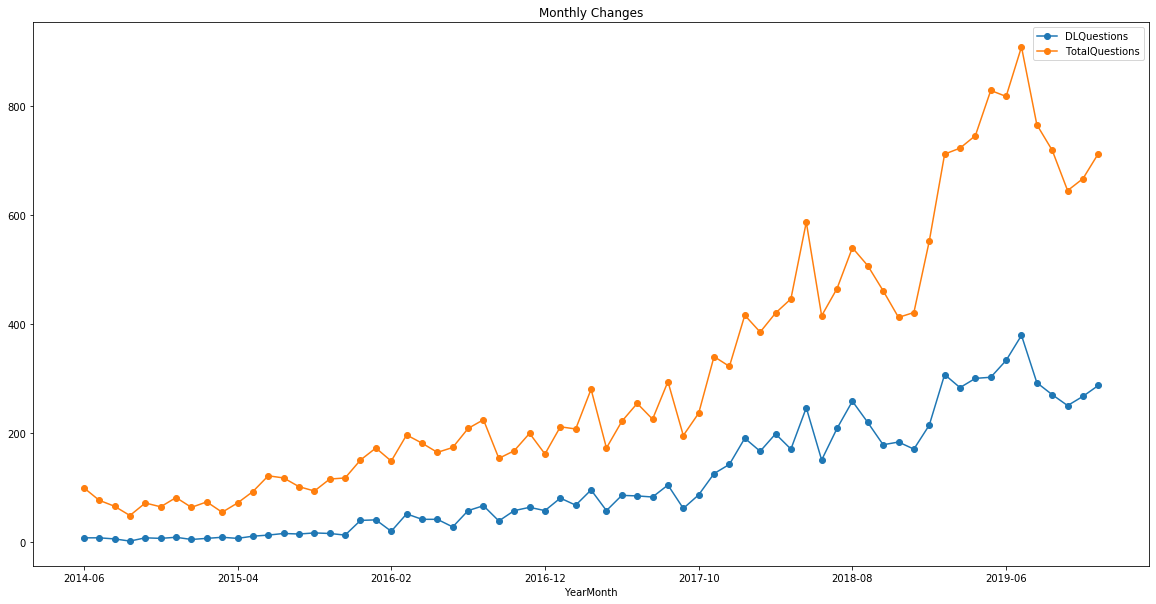

In [26]:
ax1 = monthly[['YearMonth','DLQuestions', 'TotalQuestions']].plot(x="YearMonth", 
                    kind="line", linestyle="-", marker="o", 
                    figsize=(20,10)
                    )
ax1.set_title('Monthly Changes')


Text(0.5, 1.0, 'Monthly Changes in Deep-Learning Ratio')

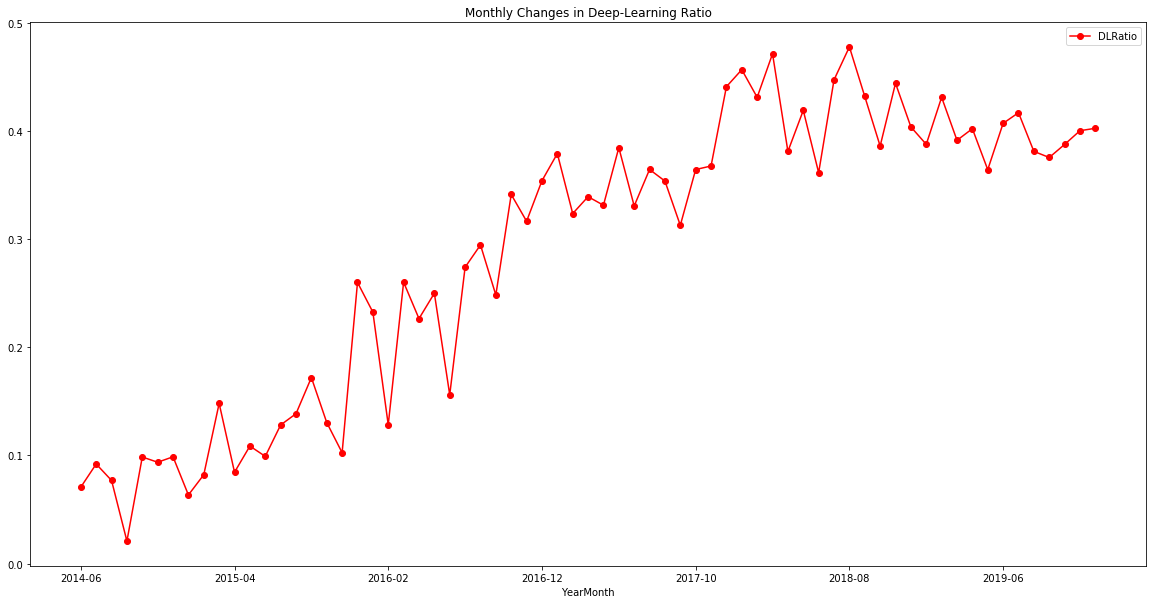

In [27]:
ax2 = monthly[['YearMonth','DLRatio']].plot(x="YearMonth", 
                    kind="line", linestyle="-", marker="o",color='red' ,
                    figsize=(20,10)
                    )
ax2.set_title('Monthly Changes in Deep-Learning Ratio')

Deep Learning(DL), as a branch of Machine Learning, employs algorithms to process data and imitate the thinking process, or to develop abstractions. DL uses layers of algorithms to process data, understand human speech, and visually recognize objects.

Starting from mid 2104, DL questions seem to have a high-growth trend  and now it looks like plateauing. 
We can not conclude that the interest in deep learning is decreasing. Currently, the processing of Big Data and the evolution of Artificial Intelligence are both dependent on Deep Learning. Deep Learning is still evolving and in need of creative ideas.